    All the techniques of handling missing values
1. Mean / Meadian / Mode Imputation 
2. Random Simple Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation  

In [58]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv", usecols= ['Survived','Age','Fare'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
print("Age is having 177 null values")
df.Age.isnull().sum()

Age is having 177 null values


177

    Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [26]:
# It is randomly picking any value from 'Age' column with no null values which is changing
# everytime
df.Age.dropna().sample()

383    35.0
Name: Age, dtype: float64

In [27]:
# It is picking randomly values from Age data (without null that's why dropna is 
# is used to drop null values) and substituting it into NAN values. 
# Using random state gives fixed values.

df['Age'].dropna().sample(df.Age.isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [29]:
def imputation(df, feature, median):
    df[feature + "_median_"] = df[feature].fillna(median)
    df[feature + "_random"] = df[feature]

    random_sample = df['Age'].dropna().sample(df.Age.isnull().sum(), random_state=0)

    random_sample.index = df[df['Age'].isnull()].index

    df.loc[df[feature].isnull(),feature+'_random']=random_sample
    

In [30]:
median = df.Age.median()
imputation(df, 'Age', median)

In [31]:
df.head()

,Survived,Age,Fare,Age_median_,Age_random,Age_end_
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [32]:
df.Age_random.isnull().sum()

0

In [34]:
# Just checking whether missing value is imputed or not
df.Age_random[888]

15.0

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

It plots Age, Age_median, Age_random on the same plot
.Which shows that Age_random has little distortion in variance as compared to Age_median(red)


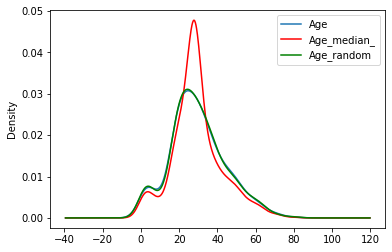

In [57]:
from turtle import color

fig = plt.figure()
ax = fig.add_subplot()

df.Age.plot(kind='kde',ax=ax)
df.Age_median_.plot(kind='kde', ax=ax, color= 'red')
df.Age_random.plot(ax=ax, kind= 'kde', color= 'green' )
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')
print("It plots Age, Age_median, Age_random on the same plot\n.Which shows that Age_random has little distortion in variance as compared to Age_median(red)")

    Advantages and Disadvantages of Random Sample Imputation

    Advantages
1. Easy to implement
2. There is very less distortion in variance#

    #### Disadvantages
4. In every situation random won't work always.

    Capturing NAN values with a new feature
-- It works well when the data is not missing at random(MNAR).

-- Just make a new feature showing 1 when null values are there and replace missing values with mean, median.

-- It is somewhat like Simple Imputer (check)


In [36]:
df['Age_new_feature'] = np.where(df['Age'].isnull(), 1, 0)

In [37]:
df.head(20)

,Survived,Age,Fare,Age_median_,Age_random,Age_end_,Age_new_feature
0,0,22.0,7.2500,22.0,22.00,22.00000,0
1,1,38.0,71.2833,38.0,38.00,38.00000,0
2,1,26.0,7.9250,26.0,26.00,26.00000,0
3,1,35.0,53.1000,35.0,35.00,35.00000,0
4,0,35.0,8.0500,35.0,35.00,35.00000,0
5,0,NaN,8.4583,28.0,28.00,73.27861,1
6,0,54.0,51.8625,54.0,54.00,54.00000,0
7,0,2.0,21.0750,2.0,2.00,2.00000,0
8,1,27.0,11.1333,27.0,27.00,27.00000,0
9,1,14.0,30.0708,14.0,14.00,14.00000,0


    Advantages and Disadvantages of Capturing NAN values with a new feature

    Advantages
-- Easy to implement.

-- Capturing the importance of missing value#

    Disadvantages
-- Creates additional features(Curse of Dimensionality).

    End of Distribution Imputation

-- It works well when the data is MNAR (Missing not at random)

-- In this, we replace missing data with values that are the tails of the distribution of the variable

In [38]:
# Checking the null values in Age
df.Age.isnull().sum()

177

    Seeing the Age distribution by drawing histplot

<AxesSubplot:xlabel='Age', ylabel='Count'>

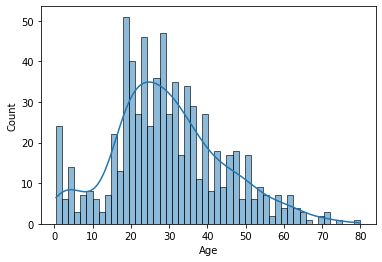

In [39]:
import seaborn as sns
sns.histplot(data= df.Age,kde=True,  bins= 50)

    Checking for outliers in AGE column


<AxesSubplot:>

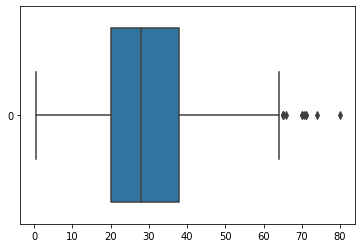

In [40]:
sns.boxplot(data= df.Age, orient= 'h')

    Replacing missing value with 3 sigma value in normal distribution i.e. 3 * df.Age.std() [Mean + 3 sigma]

In [20]:
extreme = df.Age.mean() + 3 * df.Age.std()

    Define a function to find the new feature by using End of distribution Imputation


In [41]:
def imputing(df, feature, median, extreme):
    df["Age_end_distribution"] = df['Age'].fillna(extreme)

In [42]:
imputing(df, 'Age', median, extreme)

In [43]:
df.head(10)

,Survived,Age,Fare,Age_median_,Age_random,Age_end_,Age_new_feature,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0,22.00000,0,22.00000
1,1,38.0,71.2833,38.0,38.0,38.00000,0,38.00000
2,1,26.0,7.9250,26.0,26.0,26.00000,0,26.00000
3,1,35.0,53.1000,35.0,35.0,35.00000,0,35.00000
4,0,35.0,8.0500,35.0,35.0,35.00000,0,35.00000
5,0,NaN,8.4583,28.0,28.0,73.27861,1,73.27861
6,0,54.0,51.8625,54.0,54.0,54.00000,0,54.00000
7,0,2.0,21.0750,2.0,2.0,2.00000,0,2.00000
8,1,27.0,11.1333,27.0,27.0,27.00000,0,27.00000
9,1,14.0,30.0708,14.0,14.0,14.00000,0,14.00000


    Histplot for Age_end_distribution_imputation

It can be seen that mean imputation increases count with tail value


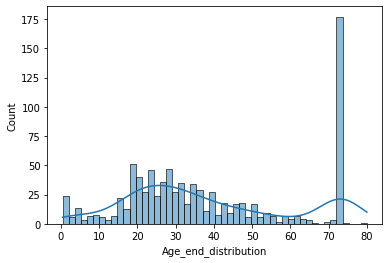

In [52]:
sns.histplot(data= df.Age_end_distribution,kde=True,  bins= 50)
print("It can be seen that mean imputation increases count with tail value")

    Drawing histplot for Age_median

It can be seen that mean imputation increases count with median value


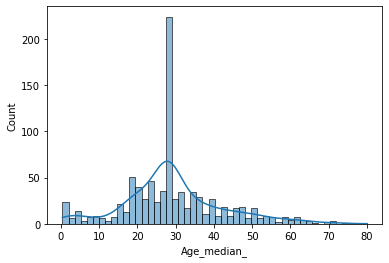

In [50]:
sns.histplot(data= df.Age_median_,kde=True,  bins= 50)
print("It can be seen that mean imputation increases count with median value")

Here there is no outliers


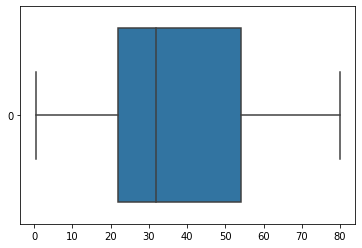

In [53]:
sns.boxplot(data= df.Age_end_distribution, orient= 'h')
print("Here there is no outliers")